In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head() #observam multe coloane, fiecare cu un "calificativ", care poate fi redus la un numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [126]:
df.columns #hai sa ne uitam dupa valori nule

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [127]:
df.describe()# cautam caracterisitici nule, dar nu se afiseaza chair toate caracterisiticle

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [128]:
df.isnull().sum() #obersvam ca avem valori lipsa la Teacher_Quality, Parental_Education_Level, Distance_from_Home
#cred ca cel mai bine ar fi sa convertim la numeric datele pentru a le analiza daca sunt MAR sau MNAR

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Text(0.5, 1.0, 'Missing values heat Map')

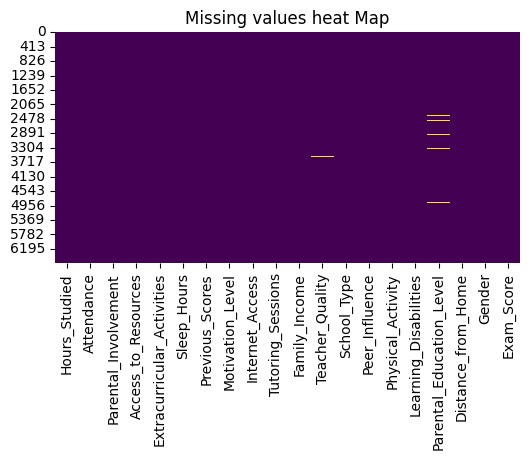

In [129]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heat Map")
#valorile par destul de aleator raspandite, deci nu pare a fi o eroare sistemica inca

In [130]:
# hai sa convertim datele in numeric

#Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions,
#Physical_activity si Exam_Score raman la fel

#Parental_Involvement, Acces_to_Rescources, Extracurricular_Activities, Motivation_level,
#Teacher_Quality, Familiy_Income  devin 0-low, 1-medium, 3-high

#Internet_Acces, School_Type, Learning_Disability, Gender devine de tip boolean Yes-True, No-False

#Peer_Presure devine 0-Negative,1-Neutral,2-Positive

#Parental_Education_level devine 0-Highschool, 1-Collage, 2-PostGraduate

#Distance_From_Home devine Near-0, Moderate-1, Far-2


df_numeric = df.copy()

level_mapping = {'Low': 0, 'Medium': 1, 'High': 3}
bool_mapping = {'Yes': True, 'No': False}
peer_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
edu_mapping = {'High School': 0, 'College': 1, 'Postgraduate': 2}
dist_mapping = {'Near': 0, 'Moderate': 1, 'Far': 2}

cols_to_map = [
    'Parental_Involvement', 'Access_to_Resources', 
    'Motivation_Level', 'Teacher_Quality', 'Family_Income'
]
for col in cols_to_map:
    df_numeric[col] = df[col].map(level_mapping)

bool_cols = ['Internet_Access', 'Learning_Disabilities', 'Extracurricular_Activities'] 
for col in bool_cols:
    df_numeric[col] = df[col].map(bool_mapping)

df_numeric['School_Type'] = df['School_Type'].map({'Public': True, 'Private': False})
df_numeric['Gender'] = df['Gender'].map({'Male': True, 'Female': False})

df_numeric['Peer_Influence'] = df['Peer_Influence'].map(peer_mapping)
df_numeric['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_mapping)
df_numeric['Distance_from_Home'] = df['Distance_from_Home'].map(dist_mapping)

df_numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,3,False,7,73,0,True,0,0,1.0,True,2,3,False,0.0,0.0,True,67
1,19,64,0,1,False,8,59,0,True,2,1,1.0,True,0,4,False,1.0,1.0,False,61
2,24,98,1,1,True,7,91,1,True,2,1,1.0,True,1,4,False,2.0,0.0,True,74
3,29,89,0,1,True,8,98,1,True,1,1,1.0,True,0,4,False,0.0,1.0,True,71
4,19,92,1,1,True,6,65,1,True,3,1,3.0,True,1,4,False,1.0,0.0,False,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,3,1.0,True,2,2,False,0.0,0.0,False,68
6603,23,76,3,1,False,8,81,1,True,3,0,3.0,True,2,2,False,0.0,0.0,False,69
6604,20,90,1,0,True,6,65,0,True,3,0,1.0,True,0,2,False,2.0,0.0,False,68
6605,10,86,3,3,True,6,91,3,True,2,0,1.0,False,2,3,False,0.0,2.0,False,68


In [146]:
#avand in vedere ca valorile lipsa sunt destul de mici fata de celalte valori
#cred ca cel mai ok ar fi sa le inlocium cu mediana
teacher_median = df_numeric['Teacher_Quality'].median()
parental_edu_median = df_numeric['Parental_Education_Level'].median()
distance_median = df_numeric['Distance_from_Home'].median()

df_numeric['Teacher_Quality'] = df_numeric['Teacher_Quality'].fillna(teacher_median)
df_numeric['Parental_Education_Level'] = df_numeric['Parental_Education_Level'].fillna(parental_edu_median)
df_numeric['Distance_from_Home'] = df_numeric['Distance_from_Home'].fillna(distance_median)

df_numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,3,False,7,73,0,True,0,0,1.0,True,2,3,False,0.0,0.0,True,67
1,19,64,0,1,False,8,59,0,True,2,1,1.0,True,0,4,False,1.0,1.0,False,61
2,24,98,1,1,True,7,91,1,True,2,1,1.0,True,1,4,False,2.0,0.0,True,74
3,29,89,0,1,True,8,98,1,True,1,1,1.0,True,0,4,False,0.0,1.0,True,71
4,19,92,1,1,True,6,65,1,True,3,1,3.0,True,1,4,False,1.0,0.0,False,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,3,1.0,True,2,2,False,0.0,0.0,False,68
6603,23,76,3,1,False,8,81,1,True,3,0,3.0,True,2,2,False,0.0,0.0,False,69
6604,20,90,1,0,True,6,65,0,True,3,0,1.0,True,0,2,False,2.0,0.0,False,68
6605,10,86,3,3,True,6,91,3,True,2,0,1.0,False,2,3,False,0.0,2.0,False,68


In [147]:
#cred ca ar fi bine sa scoatem outlierii
df_clean=df_numeric.copy()
Q1 = df_clean['Exam_Score'].quantile(0.25)
Q3 = df_clean['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #identificam outliere
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['Exam_Score'] < lower_bound) | (df_clean['Exam_Score'] > upper_bound)]
#scoatem outlieri
outliers.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,3,1,True,4,73,1,True,3,3,1.0,False,2,2,False,1.0,0.0,False,100
106,31,100,1,1,False,7,59,1,True,2,3,3.0,True,2,5,False,2.0,1.0,True,76
113,35,99,3,3,True,7,85,0,True,2,1,3.0,False,1,2,False,2.0,0.0,False,79
209,43,86,3,1,True,7,97,1,True,2,1,3.0,True,2,1,False,0.0,0.0,False,78
217,19,70,1,0,False,7,54,3,True,0,1,1.0,True,2,2,True,0.0,1.0,True,89
404,17,77,0,3,True,5,53,1,True,2,3,1.0,True,1,3,False,1.0,0.0,True,86
529,15,83,1,1,False,7,97,1,True,2,0,3.0,False,1,2,False,0.0,0.0,False,97
558,22,70,0,1,False,7,53,0,True,1,0,1.0,True,2,3,False,0.0,0.0,False,83
560,22,71,0,3,True,9,56,3,True,1,0,3.0,True,1,3,True,1.0,0.0,False,84
637,20,65,1,0,True,7,62,3,True,0,1,1.0,True,1,0,True,2.0,0.0,True,80


In [148]:
print(f"numarul de outlieri este de: \n{outliers.count()}")

numarul de outlieri este de: 
Hours_Studied                 104
Attendance                    104
Parental_Involvement          104
Access_to_Resources           104
Extracurricular_Activities    104
Sleep_Hours                   104
Previous_Scores               104
Motivation_Level              104
Internet_Access               104
Tutoring_Sessions             104
Family_Income                 104
Teacher_Quality               104
School_Type                   104
Peer_Influence                104
Physical_Activity             104
Learning_Disabilities         104
Parental_Education_Level      104
Distance_from_Home            104
Gender                        104
Exam_Score                    104
dtype: int64


In [149]:
#avem 104 de outlieri din peste 6000, deci undeva sub 2%, nu pierdem multa informatie
df_clean = df_clean.drop(outliers.index)

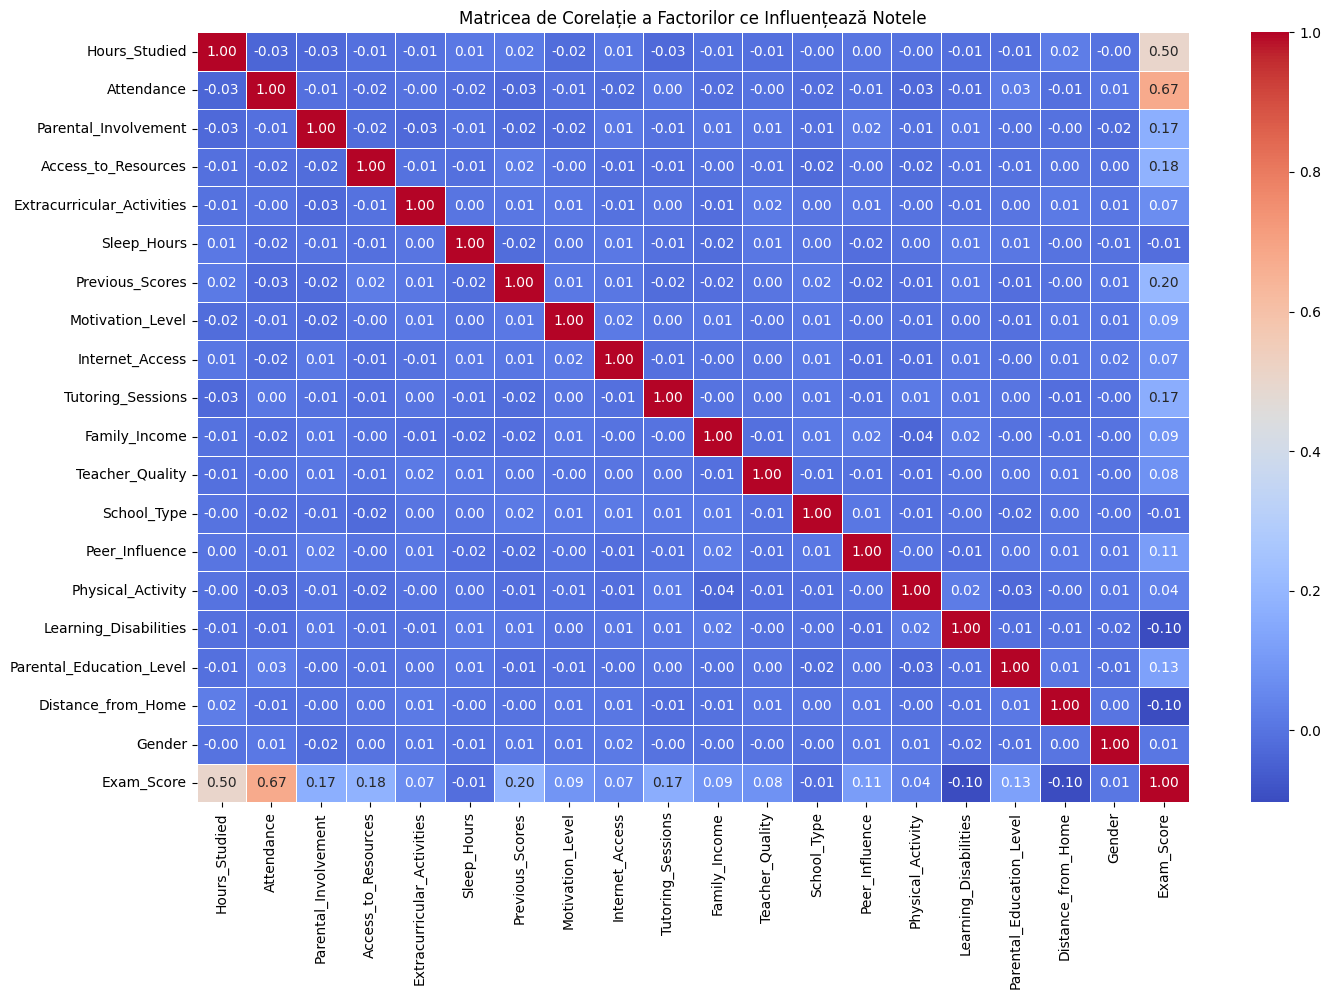

In [171]:
corr_matrix=df_clean.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de Corelație a Factorilor ce Influențează Notele')
plt.show()
#cele mai considerabile corelatii pentru nota finala sunt: orele studiate si prezenta
#totusi avem inca mult zgomot in date

In [172]:
#nu am gasit caracteristici foarte bine corelate, mai cautam
#cred ca ar fi bine sa scalam atributele, deoarece unele atribute, desi sunt contiune, pot "inghiti" altele, din cauza marii lor in comparatie
#acum hai sa combinam caracterisitici
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = [
    'Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence',
    'Sleep_Hours', 'Physical_Activity', 'Previous_Scores',
    'Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Motivation_Level'
]


scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df_clean[cols_to_scale])
df_scaled = pd.DataFrame(scaled_values, columns=cols_to_scale, index=df_clean.index)
df_combined = df_scaled.copy()
df_combined['Exam_Score'] = df_clean['Exam_Score']


df_combined['Social_Index'] = df_scaled[['Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence']].mean(axis=1)
df_combined['Health_Index'] = df_scaled[['Sleep_Hours', 'Physical_Activity']].mean(axis=1)
df_combined['Academic_Effort_Index'] = df_scaled[['Hours_Studied', 'Attendance', 'Tutoring_Sessions', 'Motivation_Level']].mean(axis=1)
df_combined['Social_Support_Score']=df_scaled[['Parental_Involvement','Parental_Education_Level','Family_Income']].mean(axis=1)
df_combined['Health_Score'] =df_scaled[['Sleep_Hours','Physical_Activity']].mean(axis=1)
df_combined['Academic_Effort_Score']=df_scaled[['Hours_Studied','Tutoring_Sessions','Motivation_Level']].mean(axis=1)

print("Corelația noilor indici cu nota finală:")
print(df_combined[['Social_Index', 'Health_Index', 'Academic_Effort_Index','Social_Support_Score','Health_Score','Academic_Effort_Score', 'Exam_Score']].corr()['Exam_Score'])
df_combined

Corelația noilor indici cu nota finală:
Social_Index             0.247805
Health_Index             0.010288
Academic_Effort_Index    0.653829
Social_Support_Score     0.223967
Health_Score             0.010288
Academic_Effort_Score    0.313517
Exam_Score               1.000000
Name: Exam_Score, dtype: float64


,Parental_Involvement,Parental_Education_Level,Family_Income,Peer_Influence,Sleep_Hours,Physical_Activity,Previous_Scores,Hours_Studied,Attendance,Tutoring_Sessions,Motivation_Level,Exam_Score,Social_Index,Health_Index,Academic_Effort_Index,Social_Support_Score,Health_Score,Academic_Effort_Score
0,0.000000,0.0,0.000000,1.0,0.500000,0.500000,0.46,0.511628,0.600,0.000,0.000000,67,0.250000,0.500000,0.277907,0.000000,0.500000,0.170543
1,0.000000,0.5,0.333333,0.0,0.666667,0.666667,0.18,0.418605,0.100,0.250,0.000000,61,0.208333,0.666667,0.192151,0.277778,0.666667,0.222868
2,0.333333,1.0,0.333333,0.5,0.500000,0.666667,0.82,0.534884,0.950,0.250,0.333333,74,0.541667,0.583333,0.517054,0.555556,0.583333,0.372739
3,0.000000,0.0,0.333333,0.0,0.666667,0.666667,0.96,0.651163,0.725,0.125,0.333333,71,0.083333,0.666667,0.458624,0.111111,0.666667,0.369832
4,0.333333,0.5,0.333333,0.5,0.333333,0.666667,0.30,0.418605,0.800,0.375,0.333333,70,0.416667,0.500000,0.481734,0.388889,0.500000,0.375646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,1.000000,0.0,1.000000,1.0,0.500000,0.333333,0.52,0.558140,0.225,0.125,0.333333,68,0.750000,0.416667,0.310368,0.666667,0.416667,0.338824
6603,1.000000,0.0,0.000000,1.0,0.666667,0.333333,0.62,0.511628,0.400,0.375,0.333333,69,0.500000,0.500000,0.404990,0.333333,0.500000,0.406654
6604,0.333333,1.0,0.000000,0.0,0.333333,0.333333,0.30,0.441860,0.750,0.375,0.000000,68,0.333333,0.333333,0.391715,0.444444,0.333333,0.272287
6605,1.000000,0.0,0.000000,1.0,0.333333,0.500000,0.82,0.209302,0.650,0.250,1.000000,68,0.500000,0.416667,0.527326,0.333333,0.416667,0.486434


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


# hai sa incercam prima data sa folosim atributele necombinate
features_brute = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Motivation_Level', 'Parental_Involvement']

X = df_clean[features_brute]
y = df_clean['Exam_Score']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

lr_brut = LinearRegression()
lr_brut.fit(X_train, y_train)

y_pred_val = lr_brut.predict(X_val)

r2 = r2_score(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = root_mean_squared_error(y_val, y_pred_val)

print("PERFORMANTA MODEL BRUT (de baza)")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f} puncte")
print(f"RMSE : {rmse:.2f} puncte")


PERFORMANTA MODEL BRUT (de baza)
R2   : 0.8218
MAE  : 1.10 puncte
RMSE : 1.36 puncte


In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# hai sa incercam si un model Random Forest

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

r2_rf = r2_score(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = root_mean_squared_error(y_val, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf)

print("PERFORMANTA MODEL RANDOM FOREST (de baza)")
print(f"R2   : {r2_rf:.4f}")
print(f"MAE  : {mae_rf:.2f} puncte")
print(f"RMSE : {rmse_rf:.2f} puncte")
print(f"MAPE : {mape_rf * 100:.2f}%")
#avand in vedere ca nici cu random Forest nu reusim sa batem regrsia liniara, hai sa incercam cu hyperparameters

PERFORMANTA MODEL RANDOM FOREST (de baza)
R2   : 0.7901
MAE  : 1.19 puncte
RMSE : 1.47 puncte
MAPE : 1.78%


In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

rf_base = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=rf_base, 
    param_grid=param_grid, 
    cv=3, 
    scoring='r2',  
    n_jobs=-1, 
    verbose=1
)


grid_search.fit(X_train, y_train)


print(f"Cele mai bune setări: {grid_search.best_params_}")
print(f"Cel mai bun scor R2 prin Cross-Validation: {grid_search.best_score_:.4f}")


best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)
print(f"R2 pe setul de Validare: {r2_score(y_val, y_val_pred):.4f}")
#nu am crescut foarte mult performanta, hai sa incercam cu campurile create de noi

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Cele mai bune setări: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Cel mai bun scor R2 prin Cross-Validation: 0.7946
R2 pe setul de Validare: 0.8002


In [177]:
features_list = ['Social_Index', 'Academic_Effort_Index', 'Social_Support_Score', 'Academic_Effort_Score']
X = df_combined[features_list]
y = df_combined['Exam_Score']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


lr_model_combined = LinearRegression()
lr_model_combined.fit(X_train, y_train)


y_pred_val = lr_model_combined.predict(X_val)

r2 = r2_score(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
rmse = root_mean_squared_error(y_val, y_pred_val)
mape = mean_absolute_percentage_error(y_val, y_pred_val)

print(f"PERFORMANTA MODEL LINIAR (cu atribute combinate)")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f} puncte")
print(f"RMSE : {rmse:.2f} puncte")
print(f"MAPE : {mape * 100:.2f}%")
#wow, avem performante mai slabe la atributele combinate, probabil variabilele separate sunt mai valoroase decat cele combinate

PERFORMANTA MODEL LINIAR (cu atribute combinate)
R2   : 0.6249
MAE  : 1.57 puncte
RMSE : 1.97 puncte
MAPE : 2.35%


In [178]:
from sklearn.model_selection import GridSearchCV


features_list = ['Social_Index', 'Academic_Effort_Index', 'Social_Support_Score', 'Academic_Effort_Score']
X = df_combined[features_list]
y = df_combined['Exam_Score']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_base = RandomForestRegressor(random_state=42)
grid_search_combined = GridSearchCV(rf_base, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search_combined.fit(X_train, y_train)


best_rf_combined = grid_search_combined.best_estimator_
y_pred_rf_val = best_rf_combined.predict(X_val)

r2_rf = r2_score(y_val, y_pred_rf_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf_val)
rmse_rf = root_mean_squared_error(y_val, y_pred_rf_val)
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf_val)

print(f"RANDOM FOREST (Tunat, cu atribute combinate)")
print(f"Setări optime: {grid_search_combined.best_params_}\n")
print(f"R2  : {r2_rf:.4f}")
print(f"MAE : {mae_rf:.2f} puncte")
print(f"MAPE: {mape_rf * 100:.2f}%")
#performanta mai buna decat regresia liniara si modelul precedent,insa hai sa incercam sa folosim si elemente combinate si originale

RANDOM FOREST (Tunat, cu atribute combinate)
Setări optime: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

R2  : 0.6590
MAE : 1.48 puncte
MAPE: 2.22%


In [179]:
# Amestecăm datele brute cu cele combinate
features_hybrid = [
    'Previous_Scores', 'Hours_Studied', 'Attendance', # Motoarele brute
    'Social_Index', 'Health_Index', 'Motivation_Level' # Contextul agregat
]

X = df_combined[features_hybrid]
y = df_combined['Exam_Score']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

lr_hybrid = LinearRegression()
lr_hybrid.fit(X_train, y_train)
r2_lr_h = r2_score(y_val, lr_hybrid.predict(X_val))

rf_hybrid = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
rf_hybrid.fit(X_train, y_train)
r2_rf_h = r2_score(y_val, rf_hybrid.predict(X_val))

y_pred_lr = lr_hybrid.predict(X_val)
y_pred_rf = rf_hybrid.predict(X_val)

mae_lr = mean_absolute_error(y_val, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_val, y_pred_lr)


mae_rf = mean_absolute_error(y_val, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf)

print(f"MODEL LINIAR (hibrid):")
print(f"R2  : {r2_lr_h:.4f}")
print(f"MAE : {mae_lr:.2f} puncte")
print(f"MAPE: {mape_lr * 100:.2f}%\n")
print(f"RANDOM FOREST:(hibrid)")
print(f"R2  : {r2_rf_h:.4f}")
print(f"MAE : {mae_rf:.2f} puncte")
print(f"MAPE: {mape_rf * 100:.2f}%")
#performante mult mai bine la modelul liniar, hai sa incercam sa optimizam cel cu random forest

MODEL LINIAR (hibrid):
R2  : 0.8568
MAE : 0.98 puncte
MAPE: 1.46%

RANDOM FOREST:(hibrid)
R2  : 0.8320
MAE : 1.06 puncte
MAPE: 1.59%


In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Explorăm sub-seturi de atribute
}

rf_hibrid_base = RandomForestRegressor(random_state=42)

grid_hibrid = GridSearchCV(
    estimator=rf_hibrid_base, 
    param_grid=param_grid, 
    cv=3, 
    scoring='r2', 
    n_jobs=-1
)

grid_hibrid.fit(X_train, y_train)

best_rf_h = grid_hibrid.best_estimator_
y_pred_rf_h = best_rf_h.predict(X_val)
r2_rf_final = r2_score(y_val, y_pred_rf_h)
mae_rf_final = mean_absolute_error(y_val, y_pred_rf_h)
mape_rf_final = mean_absolute_percentage_error(y_val, y_pred_rf_h)

print(f"RANDOM FOREST:(hibrid, optimizat)")
print(f"Cele mai bune setări: {grid_hibrid.best_params_}\n")
print(f"R2  : {r2_score(y_val, y_pred_rf_h):.4f}")
print(f"MAE : {mae_rf_final:.2f} puncte")
print(f"MAPE: {mape_rf_final * 100:.2f}%")


RANDOM FOREST:(hibrid, optimizat)
Cele mai bune setări: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

R2  : 0.8270
MAE : 1.08 puncte
MAPE: 1.62%


In [224]:
#se pare ca avem performante putin mai slabe la modelul optimizat, deci modelul castigator este modelul liniar hibrid
def prezice_nota_student(date_dict, model, scaler_obj):
    df = pd.DataFrame([date_dict])
    df[cols_to_scale] = scaler_obj.transform(df[cols_to_scale])

    df['Social_Index'] = df[['Parental_Involvement', 'Parental_Education_Level', 'Family_Income', 'Peer_Influence']].mean(axis=1)
    df['Health_Index'] = df[['Sleep_Hours', 'Physical_Activity']].mean(axis=1)
    
    features_necesare = model.feature_names_in_.tolist() #trecem de la vector NumPy la lista de python
    
    X_input = df[features_necesare] 
    nota = model.predict(X_input)[0]
    return nota

model_final=lr_hybrid

student_fictiv = {
    'Hours_Studied': 15,
    'Attendance': 75,
    'Parental_Involvement': 1,      # Medium
    'Access_to_Resources': 1,       # Medium
    'Extracurricular_Activities': 0, # No (0)
    'Sleep_Hours': 7,
    'Previous_Scores': 65,
    'Motivation_Level': 2,          # Medium
    'Internet_Access': 1,           # Yes (1)
    'Tutoring_Sessions': 1,
    'Family_Income': 1,             # Medium
    'Teacher_Quality': 1,           # Medium
    'School_Type': 0,               # Public (0)
    'Peer_Influence': 1,            # Neutral (1)
    'Physical_Activity': 3,
    'Learning_Disabilities': 0,     # No (0)
    'Parental_Education_Level': 1,  # High School (1)
    'Distance_from_Home': 1,        # Moderate
    'Gender': 1,                    # Male
}
nota_prezisa_1 = prezice_nota_student(student_fictiv, lr_hybrid, scaler)
print(f"pentru studentul ficitv, modelul prezice {nota_prezisa_1:.2f}")

pentru studentul ficitv, modelul prezice 64.37


In [225]:
#cu MAE=0.98, deci intervalul de siguranta este de [63.39,65.35]
#pentru cresterea notei la un 70 se poate creste:
#numarul de ore de studiu(la 25), 
#adugarea de sesiuni de meditatii(sa fie 4)
#sa fie mai prezent la ore

In [226]:
student_fictiv_2 = {
    'Hours_Studied': 25,
    'Attendance': 90,
    'Parental_Involvement': 1,      # Medium
    'Access_to_Resources': 1,       # Medium
    'Extracurricular_Activities': 0, # No (0)
    'Sleep_Hours': 7,
    'Previous_Scores': 65,
    'Motivation_Level': 2,          # Medium
    'Internet_Access': 1,           # Yes (1)
    'Tutoring_Sessions': 4,
    'Family_Income': 1,             # Medium
    'Teacher_Quality': 1,           # Medium
    'School_Type': 0,               # Public (0)
    'Peer_Influence': 1,            # Neutral (1)
    'Physical_Activity': 3,
    'Learning_Disabilities': 0,     # No (0)
    'Parental_Education_Level': 1,  # High School (1)
    'Distance_from_Home': 1,        # Moderate
    'Gender': 1,                    # Male                  # Male
}
nota_prezisa_2 = prezice_nota_student(student_fictiv_2, lr_hybrid, scaler)
print(f"pentru studentul ficitv, daca ar schimba unele obiceiuri, modelul prezice nota {nota_prezisa_2:.2f}")

pentru studentul ficitv, daca ar schimba unele obiceiuri, modelul prezice nota 70.22


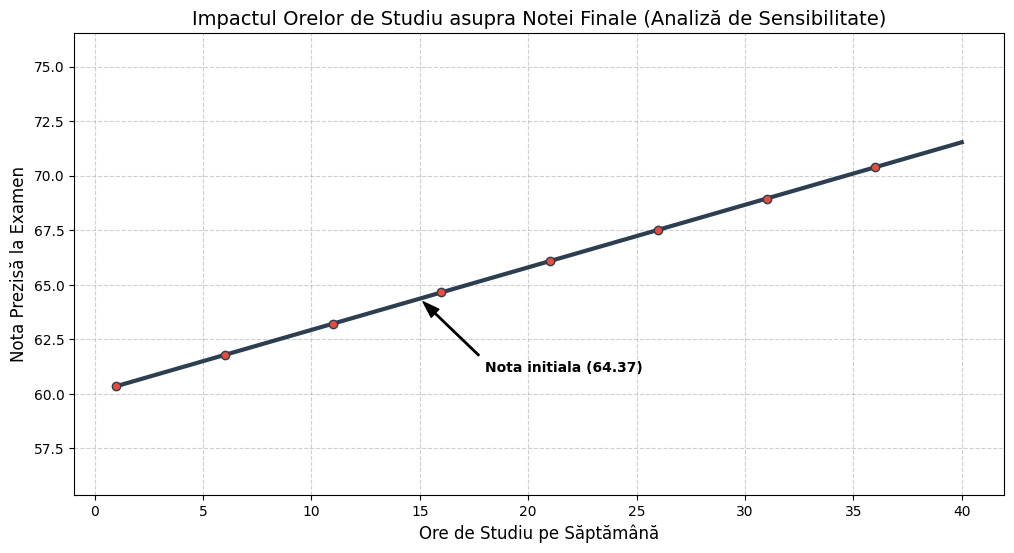

In [228]:
ore_studiu_range = np.arange(1, 41)
note_prezise = []
for ore in ore_studiu_range:
    student_temp = student_fictiv.copy()
    student_temp['Hours_Studied'] = ore
    nota = prezice_nota_student(student_temp, lr_hybrid, scaler)
    note_prezise.append(nota)

plt.figure(figsize=(12, 6))
plt.plot(ore_studiu_range, note_prezise, color='#2c3e50', linewidth=3, marker='o', markevery=5, markerfacecolor='#e74c3c')

plt.annotate(f'Nota initiala ({nota_prezisa_1:.2f})', 
             xy=(15, 64.37),             # Vârful săgeții (punctul exact de pe linie)
             xytext=(18, 61),            # Unde stă textul (mutat puțin la dreapta și jos)
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, fontweight='bold')
plt.title('Impactul Orelor de Studiu asupra Notei Finale (Analiză de Sensibilitate)', fontsize=14)
plt.xlabel('Ore de Studiu pe Săptămână', fontsize=12)
plt.ylabel('Nota Prezisă la Examen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.ylim(min(note_prezise) - 5, max(note_prezise) + 5)

plt.show()